# FordGoBikes Analysis
## by Olaoluwa Idowu


## Investigation Overview

This analysis is to examine FordGoBikes data based on Gender, User type and bike sharing.

key Insights - 

> Most riders are between the ages of 20 to 60. But there are more riders between ages 20 and 40.

> The male gender take more trips than other genders. They make up 74% of the total trips

> Only subscriber user have the bike sharing option.

> 90.1% of the trips are by subscribers


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike_clean.csv')

df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share,start_day,start_month,Age,distance(km),average_speed(km/h)
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,Thursday,February,35,0.54,0.037252
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,Thursday,February,47,2.71,0.157726
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,Thursday,February,30,0.26,0.025651
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,Thursday,February,45,2.41,5.473817
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,Thursday,February,60,3.33,6.686001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174947,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,4832,Subscriber,1996.0,Male,No,Friday,February,23,1.47,11.025000
174948,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,4960,Subscriber,1984.0,Male,No,Friday,February,35,1.40,16.102236
174949,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,3824,Subscriber,1990.0,Male,Yes,Friday,February,29,0.38,9.702128
174950,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,5095,Subscriber,1988.0,Male,No,Friday,February,31,0.75,19.424460


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Ages

> The distribution of ages is positively skewed. Majority of the riders are young 

> There are more riders between the ages of 20 and 60. There is a higher count of riders between the ages of 20 to 40.


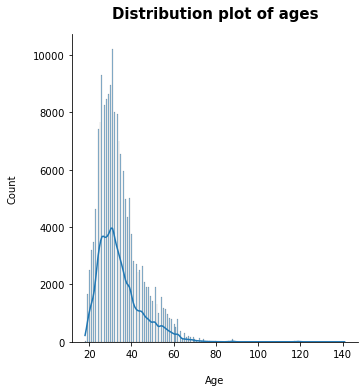

In [3]:
# Creating a function to add labels.
def put_labels(chart_title,x,y):
    if x == 0 and y == 0:
        plt.title(chart_title, fontsize=15, fontweight='bold')
    else:
        plt.title(chart_title, fontsize=15, fontweight='bold',pad=16)
        plt.xlabel(x, labelpad=16)
        plt.ylabel(y, labelpad=16)


# using seaborn to check distribution of ages
sb.displot(df.Age, kde=True);

put_labels('Distribution plot of ages', 'Age', 'Count')

## Proportion of trips based on gender

> The male gender has the highest count of trips. They make up 74.59% of the total trips

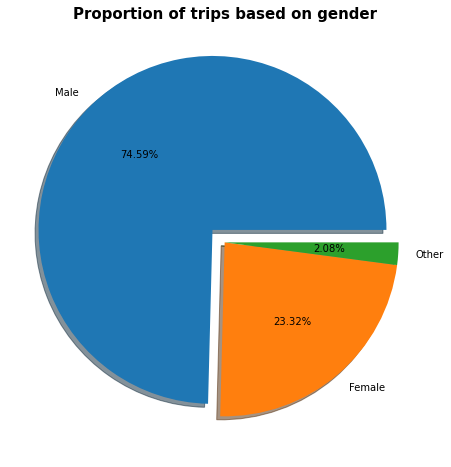

In [4]:
# Checking gender with highest count of trips 
plt.figure(figsize = [12, 8])
plt.pie(df['member_gender'].value_counts()
        , labels = df['member_gender'].value_counts().index,
        explode = [0.1,0,0], autopct='%1.2f%%', shadow=True)
put_labels('Proportion of trips based on gender', 0, 0)

## Proportion of trips based on user

> The subscriber users have higher number of trips than the customer user type. 90.5% of the trips are by subscribers

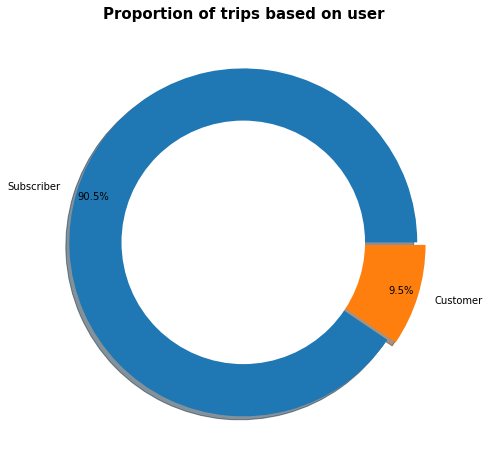

In [5]:
plt.figure(figsize = [12, 8])
plt.pie(df['user_type'].value_counts()
        , labels = df['user_type'].value_counts().index, autopct='%1.1f%%'
        , explode = [0,0.05], pctdistance=0.90, shadow=True)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
put_labels('Proportion of trips based on user', 0, 0)

# Bike sharing based on user type
> Only subscriber user have the bike sharing option. No record of bike sharing for customers

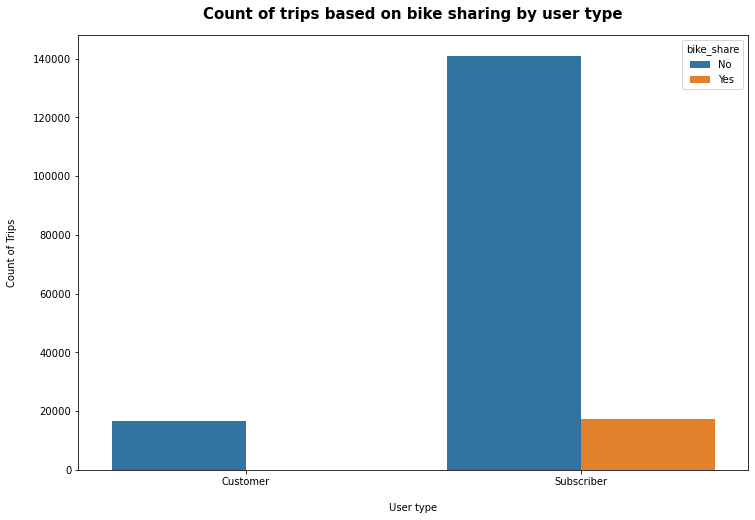

In [6]:
# Checking what user type had the higher number of bike sharing 
plt.figure(figsize = [12, 8])
sb.countplot(data = df, x = 'user_type', hue='bike_share')
put_labels('Count of trips based on bike sharing by user type', 'User type', 'Count of Trips')

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 684684 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 